In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import datetime

In [2]:
df = pd.read_csv("ks-projects-201801.csv")
display(df.head(5))
df.describe()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [4]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [7]:
df['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'suspended'],
      dtype=object)

In [8]:
successful_data = df['state'] == 'successful'
successful_data.sum()

133851

In [9]:
failed_data = df['state'] == 'failed'
failed_data.sum()

197611

In [16]:
df['category'].unique()

array(['Poetry', 'Narrative Film', 'Music', 'Restaurants', 'Food',
       'Drinks', 'Nonfiction', 'Indie Rock', 'Crafts', 'Games',
       'Tabletop Games', 'Design', 'Comic Books', 'Art Books', 'Fashion',
       'Childrenswear', 'Theater', 'Comics', 'DIY', 'Webseries',
       'Animation', 'Food Trucks', 'Product Design', 'Public Art',
       'Documentary', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Family', 'Fiction', 'Film & Video', 'Accessories', 'Rock',
       'Hardware', 'Software', 'Weaving', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Gadgets', 'Electronic Music', 'Radio & Podcasts', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       "Childre

In [10]:
df['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

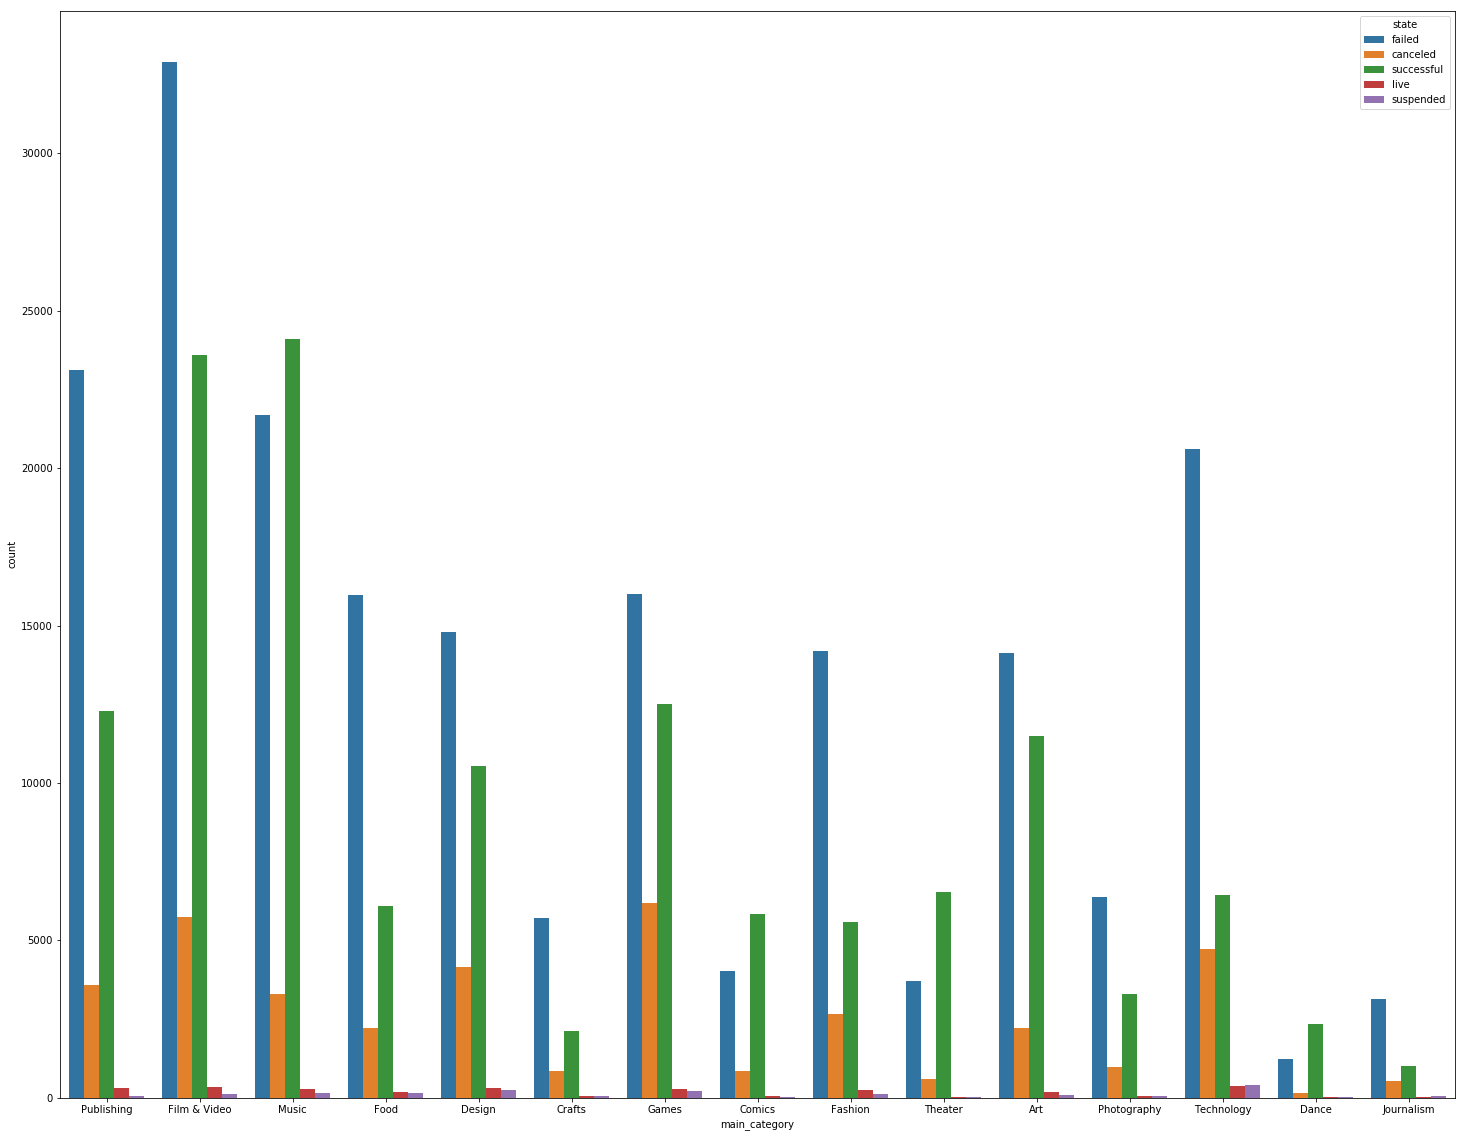

In [11]:
plt.figure(figsize=(25,20))
sns.countplot(x = df['main_category'], hue = df['state'])
plt.show()

In [12]:
df['state'] = df['state'] == 'successful'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
ID                  374860 non-null int64
name                374860 non-null object
category            374860 non-null object
main_category       374860 non-null object
currency            374860 non-null object
deadline            374860 non-null object
goal                374860 non-null float64
launched            374860 non-null object
pledged             374860 non-null float64
state               374860 non-null bool
backers             374860 non-null int64
country             374860 non-null object
usd pledged         374860 non-null float64
usd_pledged_real    374860 non-null float64
usd_goal_real       374860 non-null float64
dtypes: bool(1), float64(5), int64(2), object(7)
memory usage: 53.3+ MB


In [13]:
df['deadline'] = pd.to_datetime(df['deadline'])

In [14]:
df['launched'] = pd.to_datetime(df['launched'])

In [15]:
display(df)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,False,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,False,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,False,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,False,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,False,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,True,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,True,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,False,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,False,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,False,43,US,6240.57,6240.57,65000.00


In [16]:
import datetime as dt
df['period'] = (df['deadline'] - df['launched']).dt.days
display(df)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,period
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,False,0,GB,0.00,0.00,1533.95,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,False,15,US,100.00,2421.00,30000.00,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,False,3,US,220.00,220.00,45000.00,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,False,1,US,1.00,1.00,5000.00,29
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,False,14,US,1283.00,1283.00,19500.00,55
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,True,224,US,52375.00,52375.00,50000.00,34
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,True,16,US,1205.00,1205.00,1000.00,19
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,False,40,US,453.00,453.00,25000.00,44
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,False,58,US,8233.00,8233.00,125000.00,34
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,False,43,US,6240.57,6240.57,65000.00,29


In [18]:
df = df.drop(['ID', 'name', 'category', 'country'], axis = 1)
display(df)

,main_category,currency,deadline,goal,launched,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,period
0,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,False,0,0.00,0.00,1533.95,58
1,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,False,15,100.00,2421.00,30000.00,59
2,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,False,3,220.00,220.00,45000.00,44
3,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,False,1,1.00,1.00,5000.00,29
4,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,False,14,1283.00,1283.00,19500.00,55
5,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,True,224,52375.00,52375.00,50000.00,34
6,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,True,16,1205.00,1205.00,1000.00,19
7,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,False,40,453.00,453.00,25000.00,44
8,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,False,58,8233.00,8233.00,125000.00,34
9,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,False,43,6240.57,6240.57,65000.00,29


In [47]:
df.corr()

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,period
goal,1.000000,0.007962,NaN,0.004792,0.006416,0.005949,0.952614,0.022696
pledged,0.007962,1.000000,NaN,0.718120,0.857966,0.953465,0.005716,0.008036
state,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
backers,0.004792,0.718120,NaN,1.000000,0.697493,0.753221,0.005207,-0.000059
usd pledged,0.006416,0.857966,NaN,0.697493,1.000000,0.907713,0.006965,0.007718
usd_pledged_real,0.005949,0.953465,NaN,0.753221,0.907713,1.000000,0.006349,0.008570
usd_goal_real,0.952614,0.005716,NaN,0.005207,0.006965,0.006349,1.000000,0.021611
period,0.022696,0.008036,NaN,-0.000059,0.007718,0.008570,0.021611,1.000000


In [19]:
df = df.drop(['usd_pledged_real','usd_goal_real'], axis = 1)
display(df)

,main_category,currency,deadline,goal,launched,pledged,state,backers,usd pledged,period
0,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,False,0,0.00,58
1,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,False,15,100.00,59
2,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,False,3,220.00,44
3,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,False,1,1.00,29
4,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,False,14,1283.00,55
5,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,True,224,52375.00,34
6,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,True,16,1205.00,19
7,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,False,40,453.00,44
8,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,False,58,8233.00,34
9,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,False,43,6240.57,29


In [20]:
df = df.drop(['deadline','launched'], axis = 1)
display(df)

,main_category,currency,goal,pledged,state,backers,usd pledged,period
0,Publishing,GBP,1000.0,0.00,False,0,0.00,58
1,Film & Video,USD,30000.0,2421.00,False,15,100.00,59
2,Film & Video,USD,45000.0,220.00,False,3,220.00,44
3,Music,USD,5000.0,1.00,False,1,1.00,29
4,Film & Video,USD,19500.0,1283.00,False,14,1283.00,55
5,Food,USD,50000.0,52375.00,True,224,52375.00,34
6,Food,USD,1000.0,1205.00,True,16,1205.00,19
7,Food,USD,25000.0,453.00,False,40,453.00,44
8,Design,USD,125000.0,8233.00,False,58,8233.00,34
9,Film & Video,USD,65000.0,6240.57,False,43,6240.57,29


In [52]:
print(df.dtypes)

main_category     object
currency          object
goal             float64
pledged          float64
state               bool
backers            int64
usd pledged      float64
period             int64
dtype: object


In [21]:
df.corr()

,goal,pledged,state,backers,usd pledged,period
goal,1.000000,0.007327,-0.024660,0.003969,0.005534,0.004312
pledged,0.007327,1.000000,0.111337,0.717858,0.857370,0.000818
state,-0.024660,0.111337,1.000000,0.128692,0.097791,-0.026340
backers,0.003969,0.717858,0.128692,1.000000,0.697426,-0.000821
usd pledged,0.005534,0.857370,0.097791,0.697426,1.000000,0.000771
period,0.004312,0.000818,-0.026340,-0.000821,0.000771,1.000000


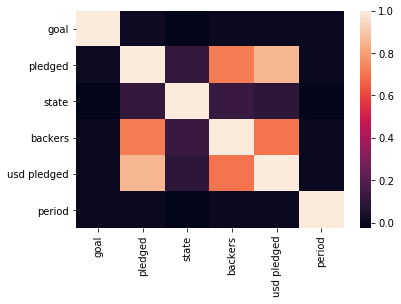

In [22]:
sns.heatmap(df.corr())

In [24]:
df_dummies = pd.get_dummies(df['main_category'])
display(df_dummies)

,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [25]:
df = pd.concat([df,df_dummies],axis = 1)
df

,main_category,currency,goal,pledged,state,backers,usd pledged,period,Art,Comics,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,Publishing,GBP,1000.0,0.00,False,0,0.00,58,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Film & Video,USD,30000.0,2421.00,False,15,100.00,59,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Film & Video,USD,45000.0,220.00,False,3,220.00,44,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Music,USD,5000.0,1.00,False,1,1.00,29,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Film & Video,USD,19500.0,1283.00,False,14,1283.00,55,0,0,...,0,1,0,0,0,0,0,0,0,0
5,Food,USD,50000.0,52375.00,True,224,52375.00,34,0,0,...,0,0,1,0,0,0,0,0,0,0
6,Food,USD,1000.0,1205.00,True,16,1205.00,19,0,0,...,0,0,1,0,0,0,0,0,0,0
7,Food,USD,25000.0,453.00,False,40,453.00,44,0,0,...,0,0,1,0,0,0,0,0,0,0
8,Design,USD,125000.0,8233.00,False,58,8233.00,34,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Film & Video,USD,65000.0,6240.57,False,43,6240.57,29,0,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
df.corr()

,goal,pledged,state,backers,usd pledged,period,Art,Comics,Crafts,Dance,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
goal,1.000000,0.007327,-0.024660,0.003969,0.005534,0.004312,-0.002083,-0.004244,-0.004947,-0.003322,...,-0.005288,0.013543,-0.000184,0.000323,0.003743,-0.010792,-0.005283,-0.005787,0.018180,-0.003200
pledged,0.007327,1.000000,0.111337,0.717858,0.857370,0.000818,-0.018233,-0.005120,-0.012497,-0.006358,...,-0.008487,-0.015518,-0.012172,0.040643,-0.007711,-0.023180,-0.010906,-0.021653,0.040975,-0.010195
state,-0.024660,0.111337,1.000000,0.128692,0.097791,-0.026340,0.030796,0.065810,-0.037872,0.055426,...,-0.059445,0.018278,-0.060676,-0.001140,-0.034108,0.105545,-0.018108,-0.031977,-0.102678,0.087355
backers,0.003969,0.717858,0.128692,1.000000,0.697426,-0.000821,-0.020154,0.005310,-0.013511,-0.007059,...,-0.012628,-0.019533,-0.015263,0.075999,-0.008501,-0.022257,-0.012639,-0.018796,0.019558,-0.011324
usd pledged,0.005534,0.857370,0.097791,0.697426,1.000000,0.000771,-0.016315,-0.003711,-0.011555,-0.005219,...,-0.008925,-0.008572,-0.009526,0.037962,-0.007033,-0.018259,-0.009271,-0.019183,0.033025,-0.007668
period,0.004312,0.000818,-0.026340,-0.000821,0.000771,1.000000,-0.005856,-0.000887,-0.006810,-0.002122,...,-0.006310,0.008856,-0.001681,-0.009452,0.000136,0.007797,-0.001674,-0.000386,0.004489,0.001214
Art,-0.002083,-0.018233,0.030796,-0.020154,-0.016315,-0.005856,1.000000,-0.049124,-0.044204,-0.028710,...,-0.072536,-0.127703,-0.075515,-0.091768,-0.032295,-0.111185,-0.049028,-0.097627,-0.087887,-0.049341
Comics,-0.004244,-0.005120,0.065810,0.005310,-0.003711,-0.000887,-0.049124,1.000000,-0.026743,-0.017369,...,-0.043883,-0.077259,-0.045686,-0.055518,-0.019538,-0.067265,-0.029661,-0.059063,-0.053171,-0.029850
Crafts,-0.004947,-0.012497,-0.037872,-0.013511,-0.011555,-0.006810,-0.044204,-0.026743,1.000000,-0.015630,...,-0.039489,-0.069522,-0.041111,-0.049959,-0.017582,-0.060529,-0.026691,-0.053148,-0.047846,-0.026861
Dance,-0.003322,-0.006358,0.055426,-0.007059,-0.005219,-0.002122,-0.028710,-0.017369,-0.015630,1.000000,...,-0.025647,-0.045153,-0.026700,-0.032447,-0.011419,-0.039312,-0.017335,-0.034519,-0.031075,-0.017446


In [28]:
y = df['state'].values
X = df.drop(['state', 'main_category', 'currency'], axis = 1).values

std_scaler = StandardScaler() 

X_scaled = std_scaler.fit_transform(X)

clf = SGDClassifier(loss = 'log', penalty = 'none', max_iter = 10000, fit_intercept = True, random_state = 1234, tol = 1e-3)

clf.fit(X_scaled, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
y_est = clf.predict(X_scaled)

conf_mat = pd.DataFrame(confusion_matrix(y, y_est),index = ["正解=成功", "正解=失敗"], columns = ["予測=成功", "予測=失敗"])
conf_mat

,予測=成功,予測=失敗
正解=成功,232813,8196
正解=失敗,34536,99315


In [30]:
y_est_proba = clf.predict_proba(X_scaled)

print("対数尤度={:.3f}".format(-log_loss(y, y_est_proba, normalize = False)))

対数尤度=-119570.027


In [31]:
print("正解率={:.3f}".format(100 * accuracy_score(y, y_est)))

正解率=88.601


In [33]:
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix 
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_est)
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-Score） = {:.3f}%'.format(100 * f1_score[0]))

適合率（Precision） = 87.082%
再現率（Recall） = 96.599%
F1値（F1-Score） = 91.594%
